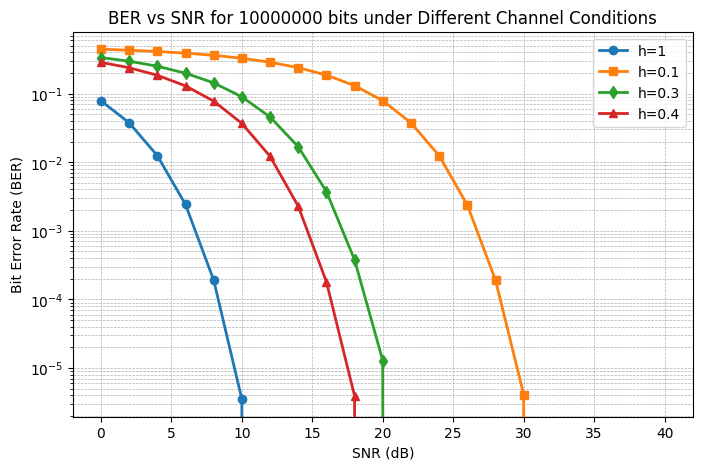

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
BIT_AMOUNT = 10000000  # Increased bit count for better accuracy
SIG_POWER = 10 ** -7  # Signal power
NOISE_POWER = 10 ** -7  # Fixed noise power
SNR_RANGE = np.arange(0, 41, 2)  # SNR values in dB
CHAN_COEFF = [1, 0.1, 0.3, 0.4]  # Different channel conditions

# BER results storage
ber_results = np.zeros((len(CHAN_COEFF), len(SNR_RANGE)))

# Plot styles (matching MATLAB styles)
plot_styles = ['o-', 's-', 'd-', '^-', 'v-', 'x-', '*-', '+-']

# BER Calculation Loop
for c, h in enumerate(CHAN_COEFF):
    for i, snr_db in enumerate(SNR_RANGE):
        snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
        noise_var = NOISE_POWER / snr_linear  # Adjust noise variance

        # Generate random bit sequence
        bits = np.random.randint(0, 2, BIT_AMOUNT)

        voltage = np.sqrt(SIG_POWER)  # Signal voltage
        threshold = h * voltage  # Adjusted decision threshold with attenuation

        # Generate noise (Gaussian)
        noise_real = (1 / np.sqrt(2)) * np.random.normal(0, np.sqrt(noise_var), BIT_AMOUNT)
        noise_img = (1 / np.sqrt(2)) * np.random.normal(0, np.sqrt(noise_var), BIT_AMOUNT)
        noise = noise_real + 1j * noise_img  # Complex AWGN

        # Transmitted signal
        t_sig = np.where(bits == 0, voltage, -voltage)

        # Apply channel attenuation
        att_sig = h * t_sig

        # Received signal
        r_sig = att_sig + noise
        real_r_sig = np.real(r_sig)

        # Decoding bits using threshold
        decoded_bits = (real_r_sig < 0).astype(int)
        error_cnt = np.sum(decoded_bits != bits)
        ber_results[c, i] = error_cnt / BIT_AMOUNT  # Compute BER

# Plot BER vs. SNR for each channel condition
plt.figure(figsize=(8, 5))
legend_labels = []

for c, h in enumerate(CHAN_COEFF):
    plt.semilogy(SNR_RANGE, ber_results[c, :], plot_styles[c % len(plot_styles)], linewidth=2, label=f'h={h}')

plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title(f'BER vs SNR for {BIT_AMOUNT} bits under Different Channel Conditions')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.yscale('log')  # Explicitly set Y-axis to log scale

plt.show()
